# Importing all the required packages and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import mysql.connector as sql
from mysql.connector import Error

#questions_df = pd.read_csv("/Users/mayurreddysangepu/Desktop/Sample_Questions.csv")

# Loading the data from MySQL Workbench 

In [2]:
try:
    conn = sql.connect(host='localhost', database='stackoverflow', user='root', password='rootroot')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        query = ("Select id, accepted_answer_id, answer_count, comment_count, " 
                       "creation_date, favorite_count, owner_user_id, related_posts, " 
                       "score, tags, title, view_count from stackoverflow_questions "
                        " where id between %s AND %s")
        start = 1
        end = 50000
        cursor.execute(query, (start, end))
        data = cursor.fetchall()
        if len(data) > 0:
            questions_df = pd.DataFrame(data, columns=["_id", "accepted_answer_id", "answer_count", "comment_count",  
                       "creation_date", "favorite_count", "owner_user_id", "related_posts",  
                       "score", "tags", "title", "view_count"])
        while True:
            start = start + 50000
            end = end + 50000
            cursor.execute(query, (start, end))
            data = cursor.fetchall()
            if len(data)>0:
                temp_df = pd.DataFrame(data, index= range (len(questions_df),len(questions_df)+len(data)), columns=["_id", "accepted_answer_id", "answer_count", "comment_count",  
                      "creation_date", "favorite_count", "owner_user_id", "related_posts",  
                      "score", "tags", "title", "view_count"])
                ques_df = [questions_df, temp_df]
                questions_df = pd.concat(ques_df)
            else:
                break
        print("Data Loaded")
        cursor.close()
        conn.close()
            
except Error as e:
        print("Error while connecting to MySQL", e)
        cursor.close()
        conn.close()


You're connected to database:  ('stackoverflow',)
68
Data Loaded


# Displaying the loaded data

In [3]:
questions_df

_id  accepted_answer_id  answer_count  comment_count  \
0             10              7596.0           NaN            NaN   
1            174                 NaN           7.0            4.0   
2            371               396.0          24.0            0.0   
3            549            477578.0          11.0           16.0   
4            622               623.0          30.0            3.0   
...          ...                 ...           ...            ...   
440055  70231258                 NaN           0.0            2.0   
440056  70231449                 NaN           0.0            0.0   
440057  70231476                 NaN           0.0            2.0   
440058  70231519                 NaN           0.0            0.0   
440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id       related_posts  \
0                      NaT             NaN       576436.0                None   
1      2008-08-01 18:33:48             7.0           96.0            [564650]   
2      2008-08-02 08:19:18           317.0           49.0          [42200904]   
3      2008-08-02 19:51:50          6715.0          136.0          [14907581]   
4      2008-08-03 05:45:21            24.0          184.0  [2211990,13894417]   
...                    ...             ...            ...                 ...   
440055 2021-12-05 03:27:01             NaN      7590347.0          [26621746]   
440056 2021-12-05 04:18:24             NaN       355456.0          [60197903]   
440057 2021-12-05 04:24:39             NaN     17592241.0          [19409717]   
440058 2021-12-05 04:37:14             NaN      8748688.0          [44945766]   
440059 2021-12-05 05:12:26             NaN     17592458.0            [409784]   

         score                                               tags  \
0          NaN                                               None   
1         83.0            ["html","c#","printing","web-services"]   
2        452.0                             ["email","email-spam"]   
3       5522.0  ["language-agnostic","forms","security","authe...   
4         63.0               ["algorithm","performance","primes"]   
...        ...                                                ...   
440055     1.0                                           ["rust"]   
440056     0.0                            ["android-databinding"]   
440057     0.0                         ["excel","vba","autofill"]   
440058     0.0              ["html","javascript","css","angular"]   
440059     0.0                                  ["java","arrays"]   

                                                    title  view_count  
0                     How to make an awesome DBSI Project         NaN  
1       How do I print an HTML document from a web ser...     16553.0  
2       How do you make sure email you send programmat...    110617.0  
3       The definitive guide to form-based website aut...    640732.0  
4       Most efficient code for the first 10000 prime ...     68443.0  
...                                                   ...         ...  
440055  Is it possible to read and write at the same t...        15.0  
440056  Two-way binding of every Observable field caus...         7.0  
440057                      Autofill down to the last row        11.0  
440058  how is possible add javascript file in angular...        11.0  
440059                          How do I print the array?        10.0  

[440060 rows x 12 columns]

# Displaying information about type of the loaded data

In [4]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440060 entries, 0 to 440059
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   _id                 440060 non-null  int64         
 1   accepted_answer_id  155150 non-null  float64       
 2   answer_count        440059 non-null  float64       
 3   comment_count       440059 non-null  float64       
 4   creation_date       440059 non-null  datetime64[ns]
 5   favorite_count      107323 non-null  float64       
 6   owner_user_id       432213 non-null  float64       
 7   related_posts       440059 non-null  object        
 8   score               440059 non-null  float64       
 9   tags                440059 non-null  object        
 10  title               440060 non-null  object        
 11  view_count          440059 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 40.3+ MB


# clean_tags function cleans the tags and formats them as a list of tags 

In [5]:
questions_df['tags_list'] = None
def clean_tags():
    for i in range(0,len(questions_df.tags)):
        if type(questions_df.tags[i]) == str:
            tmp = questions_df.tags[i].replace(",","")
            tmp = tmp.replace("[","")
            tmp = tmp.replace("]","")
            tmp = tmp.replace(" ","")
            tmp = tmp.split("\"")
            test_list = list(filter(None, tmp))
            questions_df.tags_list[i] = test_list

In [6]:
clean_tags()

/var/folders/nn/034qbjws18j5cqqw317jpgsw0000gn/T/ipykernel_9081/4018642821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df.tags_list[i] = test_list


In [7]:
questions_df

_id  accepted_answer_id  answer_count  comment_count  \
0             10              7596.0           NaN            NaN   
1            174                 NaN           7.0            4.0   
2            371               396.0          24.0            0.0   
3            549            477578.0          11.0           16.0   
4            622               623.0          30.0            3.0   
...          ...                 ...           ...            ...   
440055  70231258                 NaN           0.0            2.0   
440056  70231449                 NaN           0.0            0.0   
440057  70231476                 NaN           0.0            2.0   
440058  70231519                 NaN           0.0            0.0   
440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id       related_posts  \
0                      NaT             NaN       576436.0                None   
1      2008-08-01 18:33:48             7.0           96.0            [564650]   
2      2008-08-02 08:19:18           317.0           49.0          [42200904]   
3      2008-08-02 19:51:50          6715.0          136.0          [14907581]   
4      2008-08-03 05:45:21            24.0          184.0  [2211990,13894417]   
...                    ...             ...            ...                 ...   
440055 2021-12-05 03:27:01             NaN      7590347.0          [26621746]   
440056 2021-12-05 04:18:24             NaN       355456.0          [60197903]   
440057 2021-12-05 04:24:39             NaN     17592241.0          [19409717]   
440058 2021-12-05 04:37:14             NaN      8748688.0          [44945766]   
440059 2021-12-05 05:12:26             NaN     17592458.0            [409784]   

         score                                               tags  \
0          NaN                                               None   
1         83.0            ["html","c#","printing","web-services"]   
2        452.0                             ["email","email-spam"]   
3       5522.0  ["language-agnostic","forms","security","authe...   
4         63.0               ["algorithm","performance","primes"]   
...        ...                                                ...   
440055     1.0                                           ["rust"]   
440056     0.0                            ["android-databinding"]   
440057     0.0                         ["excel","vba","autofill"]   
440058     0.0              ["html","javascript","css","angular"]   
440059     0.0                                  ["java","arrays"]   

                                                    title  view_count  \
0                     How to make an awesome DBSI Project         NaN   
1       How do I print an HTML document from a web ser...     16553.0   
2       How do you make sure email you send programmat...    110617.0   
3       The definitive guide to form-based website aut...    640732.0   
4       Most efficient code for the first 10000 prime ...     68443.0   
...                                                   ...         ...   
440055  Is it possible to read and write at the same t...        15.0   
440056  Two-way binding of every Observable field caus...         7.0   
440057                      Autofill down to the last row        11.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list  
0                                                    None  
1                      [html, c#, printing, web-services]  
2                                     [email, email-spam]  
3       [language-agnostic, forms, security, authentic...  
4                        [algorithm, performance, primes]  
...                                                   ...  
440055                                             [rust]  
440056                   

# Creating new column as clean_tags where we are considering 'python', 'r', 'c#', 'java', 'android', 'html', 'kotlin', 'c', 'c++' language question with tags

In [8]:
req_tags = ['python', 'r', 'c#', 'java', 'android', 'html', 'kotlin', 'c', 'c++']

def clean_tags(tag):
    clean_tag = []
    for t in tag:
        if t in req_tags:
            clean_tag.append(t)
        return clean_tag 

In [9]:
questions_df['clean_tags'] = None
def create_clean_tags():
    for i in range(0,len(questions_df["tags_list"])):
        if (type(questions_df["tags_list"][i]) == 'list'):
            questions_df.clean_tags[i] = clean_tags(questions_df["tags_list"][i])

In [10]:
create_clean_tags()

In [11]:
questions_df

_id  accepted_answer_id  answer_count  comment_count  \
0             10              7596.0           NaN            NaN   
1            174                 NaN           7.0            4.0   
2            371               396.0          24.0            0.0   
3            549            477578.0          11.0           16.0   
4            622               623.0          30.0            3.0   
...          ...                 ...           ...            ...   
440055  70231258                 NaN           0.0            2.0   
440056  70231449                 NaN           0.0            0.0   
440057  70231476                 NaN           0.0            2.0   
440058  70231519                 NaN           0.0            0.0   
440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id       related_posts  \
0                      NaT             NaN       576436.0                None   
1      2008-08-01 18:33:48             7.0           96.0            [564650]   
2      2008-08-02 08:19:18           317.0           49.0          [42200904]   
3      2008-08-02 19:51:50          6715.0          136.0          [14907581]   
4      2008-08-03 05:45:21            24.0          184.0  [2211990,13894417]   
...                    ...             ...            ...                 ...   
440055 2021-12-05 03:27:01             NaN      7590347.0          [26621746]   
440056 2021-12-05 04:18:24             NaN       355456.0          [60197903]   
440057 2021-12-05 04:24:39             NaN     17592241.0          [19409717]   
440058 2021-12-05 04:37:14             NaN      8748688.0          [44945766]   
440059 2021-12-05 05:12:26             NaN     17592458.0            [409784]   

         score                                               tags  \
0          NaN                                               None   
1         83.0            ["html","c#","printing","web-services"]   
2        452.0                             ["email","email-spam"]   
3       5522.0  ["language-agnostic","forms","security","authe...   
4         63.0               ["algorithm","performance","primes"]   
...        ...                                                ...   
440055     1.0                                           ["rust"]   
440056     0.0                            ["android-databinding"]   
440057     0.0                         ["excel","vba","autofill"]   
440058     0.0              ["html","javascript","css","angular"]   
440059     0.0                                  ["java","arrays"]   

                                                    title  view_count  \
0                     How to make an awesome DBSI Project         NaN   
1       How do I print an HTML document from a web ser...     16553.0   
2       How do you make sure email you send programmat...    110617.0   
3       The definitive guide to form-based website aut...    640732.0   
4       Most efficient code for the first 10000 prime ...     68443.0   
...                                                   ...         ...   
440055  Is it possible to read and write at the same t...        15.0   
440056  Two-way binding of every Observable field caus...         7.0   
440057                      Autofill down to the last row        11.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list clean_tags  
0                                                    None       None  
1                      [html, c#, printing, web-services]       None  
2                                     [email, email-spam]       None  
3       [language-agnostic, forms, security, authentic...       None  
4                        [algorithm, performance, primes]       None  
...                                                   ...        ...  
440055  

In [12]:
test_l = []
for i in questions_df.tags_list:
    if(type(i) != "list"):
        test_l.append(i)

In [17]:
for i in range(0,len(questions_df.tags_list)):
    if questions_df.tags_list[i] != None:
        for j in questions_df.tags_list[i]:
            if j in req_tags:
                questions_df.clean_tags[i] = j;
                print(j)

html
c#
python
c
c++
html
c
c++
c++
c#
c#
c
c++
python
c#
python
c#
html
c++
html
java
c#
java
c#
python
python
c++
c
c#
java
c#
java
java
c#
java
c
c++
c#
c#
c++
python
c#
python
html
c
c
c++
java
java
c#
java
c#
c#
c#
python
html
java
c#
java
c++
c#
java
java
html
c#
c++
c#
java
c++
c++
c#
python
c
c++
python
c#
java
c#
java
c#
c#
python
html
python
c#
c#
python
java
python
c++
c#
c#
c++
java
java
java
c++
c#
python
java
python
c#
java
java
python
c#
python
python
c
c++
c#
java
java
c
c
c#
c++
c++
c#
java
c++
c#
java
c#
c#
python
c#
python
c#
java
c#
c#
c++
python
c#
c
c#
java
python
c#
c++
c#
java
java
c++
python
c#
java
html
c
c++
java
c++
c#
c
c++
c#
c#
c
java
python
c++
java
java
html
c#
c#
c++
c++
c
java
html
c#
c#
c#
c#
python
c++
c++
c
c++
c#
c#
c++
java
c#
c
c++
c#
c
c
python
c
c++
c++
c#
c++
java
c++
java
python
python
java
c++
c++
c++
html
c#
html
html
c#
java
html
c
java
c#
c
c#
c#
c#
html
c#
python
c#
c#
c#
c#
c++
python
java
python
c
c++
python
c
c
python
python
c++
pyth

/var/folders/nn/034qbjws18j5cqqw317jpgsw0000gn/T/ipykernel_9081/3799789120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df.clean_tags[i] = j;


In [18]:
questions_df

_id  accepted_answer_id  answer_count  comment_count  \
0             10              7596.0           NaN            NaN   
1            174                 NaN           7.0            4.0   
2            371               396.0          24.0            0.0   
3            549            477578.0          11.0           16.0   
4            622               623.0          30.0            3.0   
...          ...                 ...           ...            ...   
440055  70231258                 NaN           0.0            2.0   
440056  70231449                 NaN           0.0            0.0   
440057  70231476                 NaN           0.0            2.0   
440058  70231519                 NaN           0.0            0.0   
440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id       related_posts  \
0                      NaT             NaN       576436.0                None   
1      2008-08-01 18:33:48             7.0           96.0            [564650]   
2      2008-08-02 08:19:18           317.0           49.0          [42200904]   
3      2008-08-02 19:51:50          6715.0          136.0          [14907581]   
4      2008-08-03 05:45:21            24.0          184.0  [2211990,13894417]   
...                    ...             ...            ...                 ...   
440055 2021-12-05 03:27:01             NaN      7590347.0          [26621746]   
440056 2021-12-05 04:18:24             NaN       355456.0          [60197903]   
440057 2021-12-05 04:24:39             NaN     17592241.0          [19409717]   
440058 2021-12-05 04:37:14             NaN      8748688.0          [44945766]   
440059 2021-12-05 05:12:26             NaN     17592458.0            [409784]   

         score                                               tags  \
0          NaN                                               None   
1         83.0            ["html","c#","printing","web-services"]   
2        452.0                             ["email","email-spam"]   
3       5522.0  ["language-agnostic","forms","security","authe...   
4         63.0               ["algorithm","performance","primes"]   
...        ...                                                ...   
440055     1.0                                           ["rust"]   
440056     0.0                            ["android-databinding"]   
440057     0.0                         ["excel","vba","autofill"]   
440058     0.0              ["html","javascript","css","angular"]   
440059     0.0                                  ["java","arrays"]   

                                                    title  view_count  \
0                     How to make an awesome DBSI Project         NaN   
1       How do I print an HTML document from a web ser...     16553.0   
2       How do you make sure email you send programmat...    110617.0   
3       The definitive guide to form-based website aut...    640732.0   
4       Most efficient code for the first 10000 prime ...     68443.0   
...                                                   ...         ...   
440055  Is it possible to read and write at the same t...        15.0   
440056  Two-way binding of every Observable field caus...         7.0   
440057                      Autofill down to the last row        11.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list clean_tags  
0                                                    None       None  
1                      [html, c#, printing, web-services]         c#  
2                                     [email, email-spam]       None  
3       [language-agnostic, forms, security, authentic...       None  
4                        [algorithm, performance, primes]       None  
...                                                   ...        ...  
440055  

# After preprocesssing / cleaning data saving it into the excel

In [19]:
questions_df.to_excel("questions_tag_clean.xlsx")

In [20]:
test = pd.read_excel("questions_tag_clean.xlsx")

In [21]:
test

Unnamed: 0       _id  accepted_answer_id  answer_count  comment_count  \
0                0        10              7596.0           NaN            NaN   
1                1       174                 NaN           7.0            4.0   
2                2       371               396.0          24.0            0.0   
3                3       549            477578.0          11.0           16.0   
4                4       622               623.0          30.0            3.0   
...            ...       ...                 ...           ...            ...   
440055      440055  70231258                 NaN           0.0            2.0   
440056      440056  70231449                 NaN           0.0            0.0   
440057      440057  70231476                 NaN           0.0            2.0   
440058      440058  70231519                 NaN           0.0            0.0   
440059      440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id       related_posts  \
0                      NaT             NaN       576436.0                 NaN   
1      2008-08-01 18:33:48             7.0           96.0            [564650]   
2      2008-08-02 08:19:18           317.0           49.0          [42200904]   
3      2008-08-02 19:51:50          6715.0          136.0          [14907581]   
4      2008-08-03 05:45:21            24.0          184.0  [2211990,13894417]   
...                    ...             ...            ...                 ...   
440055 2021-12-05 03:27:01             NaN      7590347.0          [26621746]   
440056 2021-12-05 04:18:24             NaN       355456.0          [60197903]   
440057 2021-12-05 04:24:39             NaN     17592241.0          [19409717]   
440058 2021-12-05 04:37:14             NaN      8748688.0          [44945766]   
440059 2021-12-05 05:12:26             NaN     17592458.0            [409784]   

         score                                               tags  \
0          NaN                                                NaN   
1         83.0            ["html","c#","printing","web-services"]   
2        452.0                             ["email","email-spam"]   
3       5522.0  ["language-agnostic","forms","security","authe...   
4         63.0               ["algorithm","performance","primes"]   
...        ...                                                ...   
440055     1.0                                           ["rust"]   
440056     0.0                            ["android-databinding"]   
440057     0.0                         ["excel","vba","autofill"]   
440058     0.0              ["html","javascript","css","angular"]   
440059     0.0                                  ["java","arrays"]   

                                                    title  view_count  \
0                     How to make an awesome DBSI Project         NaN   
1       How do I print an HTML document from a web ser...     16553.0   
2       How do you make sure email you send programmat...    110617.0   
3       The definitive guide to form-based website aut...    640732.0   
4       Most efficient code for the first 10000 prime ...     68443.0   
...                                                   ...         ...   
440055  Is it possible to read and write at the same t...        15.0   
440056  Two-way binding of every Observable field caus...         7.0   
440057                      Autofill down to the last row        11.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list clean_tags  
0                                                     NaN        NaN  
1              ['html', 'c#', 'printing', 'web-services']         c#  
2                                 ['email', 'email-spam']        NaN  
3       ['language-agnostic', 'forms', 'security', 'au...        NaN  
4

In [22]:
test = test.dropna(subset=['clean_tags'])

In [23]:
test

Unnamed: 0       _id  accepted_answer_id  answer_count  comment_count  \
1                1       174                 NaN           7.0            4.0   
5                5       773              7286.0          14.0            1.0   
9                9      2540              2697.0           5.0            0.0   
14              14      4306              4311.0          11.0            0.0   
17              17      4973              5103.0          14.0            0.0   
...            ...       ...                 ...           ...            ...   
440051      440051  70231098                 NaN           0.0            0.0   
440052      440052  70231106                 NaN           0.0            1.0   
440054      440054  70231232                 NaN           0.0            2.0   
440058      440058  70231519                 NaN           0.0            0.0   
440059      440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id  \
1      2008-08-01 18:33:48             7.0           96.0   
5      2008-08-03 18:27:10           241.0          207.0   
9      2008-08-05 16:30:37            20.0          136.0   
14     2008-08-07 02:29:58            17.0          522.0   
17     2008-08-07 17:02:23             7.0          404.0   
...                    ...             ...            ...   
440051 2021-12-05 02:37:00             NaN     17495244.0   
440052 2021-12-05 02:39:15             NaN      3708093.0   
440054 2021-12-05 03:16:10             NaN     17591974.0   
440058 2021-12-05 04:37:14             NaN      8748688.0   
440059 2021-12-05 05:12:26             NaN     17592458.0   

                     related_posts  score  \
1                         [564650]   83.0   
5       [2154249,5695208,44790869]  594.0   
9                       [17447802]   48.0   
14                      [35985960]   56.0   
17                        [211383]   39.0   
...                            ...    ...   
440051                  [49649215]    0.0   
440052                  [57631090]    0.0   
440054                   [1931126]    0.0   
440058                  [44945766]    0.0   
440059                    [409784]    0.0   

                                                 tags  \
1             ["html","c#","printing","web-services"]   
5                              ["python","itertools"]   
9              ["c","architecture","data-structures"]   
14      ["c++","oop","hash","maps","data-structures"]   
17                                     ["html","css"]   
...                                               ...   
440051            ["python","import","excel","image"]   
440052                 ["shell","android","keyevent"]   
440054                             ["c++","pointers"]   
440058          ["html","javascript","css","angular"]   
440059                              ["java","arrays"]   

                                                    title  view_count  \
1       How do I print an HTML document from a web ser...     16553.0   
5                       How do I use itertools.groupby()?    361938.0   
9                             Good STL-like library for C      8146.0   
14      What is the best way to create a sparse array ...     50927.0   
17                Setting a div's height in HTML with CSS    174217.0   
...                                                   ...         ...   
440051  Import images from Excel to Python to create p...         8.0   
440052                                Simulate "Ctrl + Z"        21.0   
440054  clearing a vector of pointers (affecting the d...        17.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list clean_tags  
1              ['html', 'c#', 'printing', 'web-services']         c#  
5                                 ['python', 'itertools']

In [24]:
test.columns

Index(['Unnamed: 0', '_id', 'accepted_answer_id', 'answer_count',
       'comment_count', 'creation_date', 'favorite_count', 'owner_user_id',
       'related_posts', 'score', 'tags', 'title', 'view_count', 'tags_list',
       'clean_tags'],
      dtype='object')

In [25]:
# test = test.drop(columns=['Unnamed: 0', '_id', 'accepted_answer_id', 'answer_count',
#        'comment_count', 'creation_date', 'favorite_count', 'owner_user_id',
#        'related_posts', 'score', 'tags', 'view_count', 'tags_list'])

In [26]:
test.to_csv('all_data.csv')

In [27]:
test

Unnamed: 0       _id  accepted_answer_id  answer_count  comment_count  \
1                1       174                 NaN           7.0            4.0   
5                5       773              7286.0          14.0            1.0   
9                9      2540              2697.0           5.0            0.0   
14              14      4306              4311.0          11.0            0.0   
17              17      4973              5103.0          14.0            0.0   
...            ...       ...                 ...           ...            ...   
440051      440051  70231098                 NaN           0.0            0.0   
440052      440052  70231106                 NaN           0.0            1.0   
440054      440054  70231232                 NaN           0.0            2.0   
440058      440058  70231519                 NaN           0.0            0.0   
440059      440059  70231642                 NaN           0.0            4.0   

             creation_date  favorite_count  owner_user_id  \
1      2008-08-01 18:33:48             7.0           96.0   
5      2008-08-03 18:27:10           241.0          207.0   
9      2008-08-05 16:30:37            20.0          136.0   
14     2008-08-07 02:29:58            17.0          522.0   
17     2008-08-07 17:02:23             7.0          404.0   
...                    ...             ...            ...   
440051 2021-12-05 02:37:00             NaN     17495244.0   
440052 2021-12-05 02:39:15             NaN      3708093.0   
440054 2021-12-05 03:16:10             NaN     17591974.0   
440058 2021-12-05 04:37:14             NaN      8748688.0   
440059 2021-12-05 05:12:26             NaN     17592458.0   

                     related_posts  score  \
1                         [564650]   83.0   
5       [2154249,5695208,44790869]  594.0   
9                       [17447802]   48.0   
14                      [35985960]   56.0   
17                        [211383]   39.0   
...                            ...    ...   
440051                  [49649215]    0.0   
440052                  [57631090]    0.0   
440054                   [1931126]    0.0   
440058                  [44945766]    0.0   
440059                    [409784]    0.0   

                                                 tags  \
1             ["html","c#","printing","web-services"]   
5                              ["python","itertools"]   
9              ["c","architecture","data-structures"]   
14      ["c++","oop","hash","maps","data-structures"]   
17                                     ["html","css"]   
...                                               ...   
440051            ["python","import","excel","image"]   
440052                 ["shell","android","keyevent"]   
440054                             ["c++","pointers"]   
440058          ["html","javascript","css","angular"]   
440059                              ["java","arrays"]   

                                                    title  view_count  \
1       How do I print an HTML document from a web ser...     16553.0   
5                       How do I use itertools.groupby()?    361938.0   
9                             Good STL-like library for C      8146.0   
14      What is the best way to create a sparse array ...     50927.0   
17                Setting a div's height in HTML with CSS    174217.0   
...                                                   ...         ...   
440051  Import images from Excel to Python to create p...         8.0   
440052                                Simulate "Ctrl + Z"        21.0   
440054  clearing a vector of pointers (affecting the d...        17.0   
440058  how is possible add javascript file in angular...        11.0   
440059                          How do I print the array?        10.0   

                                                tags_list clean_tags  
1              ['html', 'c#', 'printing', 'web-services']         c#  
5                                 ['python', 'itertools']

In [28]:
dict_ans_cout = {'python':0, 'r':0, 'c#':0, 'java':0, 'android':0, 'html':0, 'kotlin':0, 'c':0, 'c++':0}

In [29]:
test = test.reset_index()

In [30]:
test = test.drop(columns={'Unnamed: 0'})

In [31]:
for i in range(0,len(test.clean_tags)):
    add = dict_ans_cout.get(test.clean_tags[i]) + test.answer_count[i]
    dict_ans_cout[test.clean_tags[i]] = add

In [32]:
dict_ans_cout

{'python': 49142.0,
 'r': 13924.0,
 'c#': 47496.0,
 'java': 52072.0,
 'android': 43990.0,
 'html': 27859.0,
 'kotlin': 1275.0,
 'c': 12635.0,
 'c++': 27922.0}

In [33]:
x = dict_ans_cout.values()
y = dict_ans_cout.keys()

# Analyses on questions answered in each language

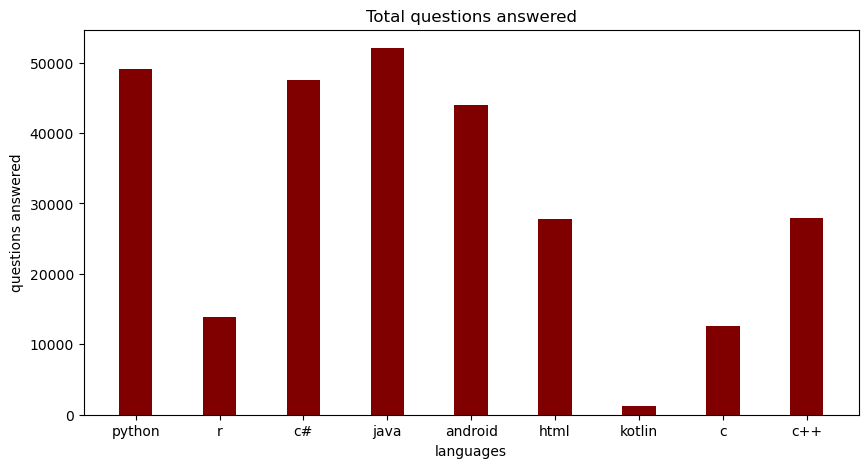

In [34]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, x, color ='maroon',
        width = 0.4)
 
plt.xlabel("languages")
plt.ylabel("questions answered")
plt.title("Total questions answered")
plt.show()

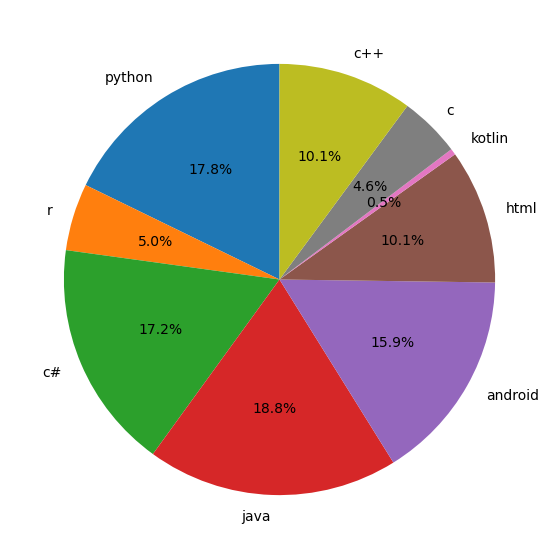

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x, labels = y,autopct='%1.1f%%', startangle=90);

In [36]:
dict_total_question = {'python':0, 'r':0, 'c#':0, 'java':0, 'android':0, 'html':0, 'kotlin':0, 'c':0, 'c++':0}

In [37]:
for i in range(0,len(test.clean_tags)):
    add = dict_total_question.get(test.clean_tags[i]) +1
    dict_total_question[test.clean_tags[i]] = add

In [38]:
x = dict_total_question.values()
y = dict_total_question.keys()

# Analyses on total questions asked in each language 

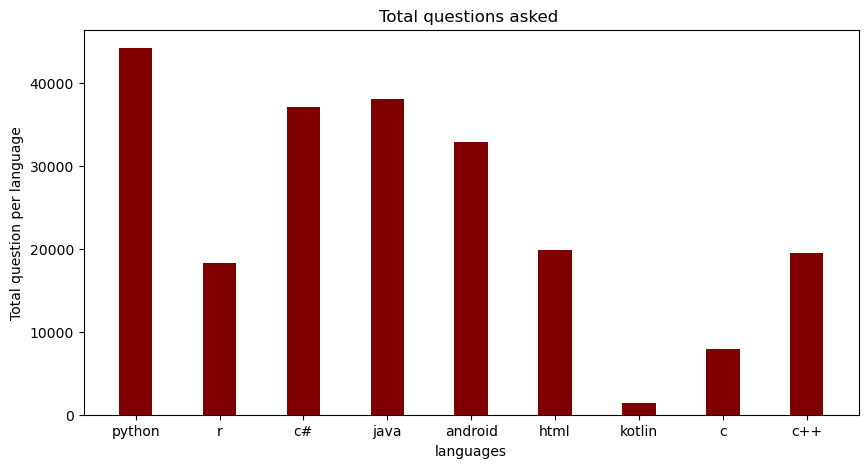

<Figure size 640x480 with 0 Axes>

In [39]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, x, color ='maroon',
        width = 0.4)
 
plt.xlabel("languages")
plt.ylabel("Total question per language")
plt.title("Total questions asked ")
plt.show()
plt.savefig('Total questions asked bar.png')

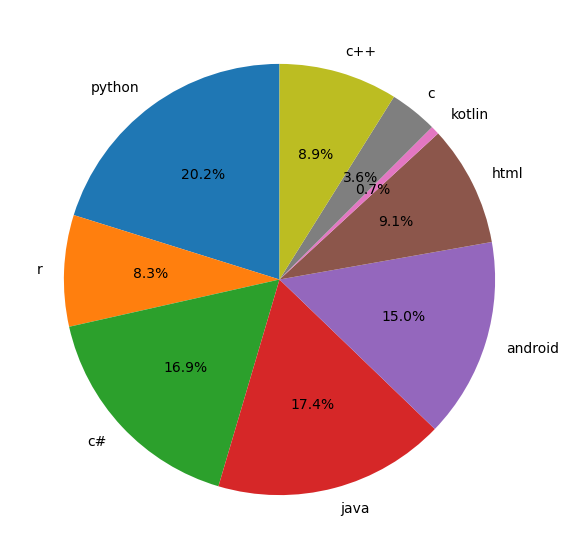

In [40]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x, labels = y,autopct='%1.1f%%', startangle=90);
plt.savefig('Total questions asked pie.png')

In [41]:
test.accepted_answer_id.isnull().value_counts()

True     141728
False     77662
Name: accepted_answer_id, dtype: int64

In [42]:
dict_accepted_ans = {'python':0, 'r':0, 'c#':0, 'java':0, 'android':0, 'html':0, 'kotlin':0, 'c':0, 'c++':0}

In [43]:
for i in range(0,len(test.accepted_answer_id)):
    if(pd.isna(test.accepted_answer_id[i])):
        i
    else:
        dict_accepted_ans[test.clean_tags[i]] =  dict_accepted_ans.get(test.clean_tags[i]) +1 

In [44]:
x = dict_accepted_ans.values()
y = dict_accepted_ans.keys()
x = list(x)
y= list(y)

# Analyses on total accepted answers in each language

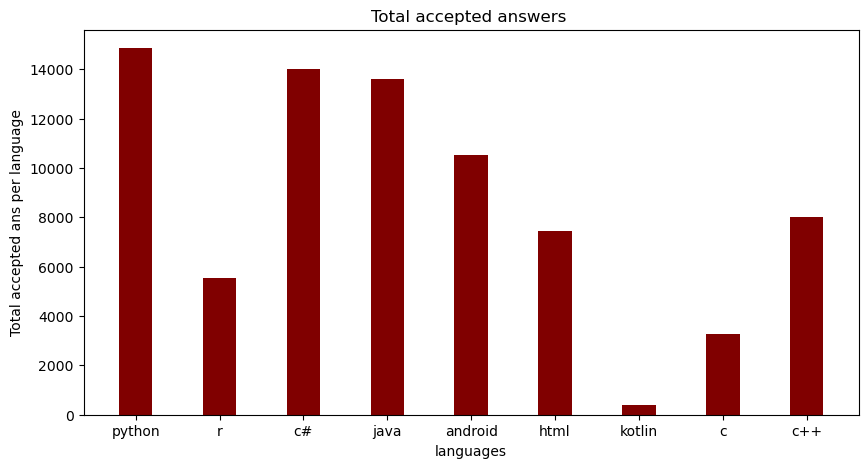

<Figure size 640x480 with 0 Axes>

In [45]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, x, color ='maroon',
        width = 0.4)
 
plt.xlabel("languages")
plt.ylabel("Total accepted ans per language")
plt.title("Total accepted answers ")
plt.show()
plt.savefig('Total accepted answers bar.png')

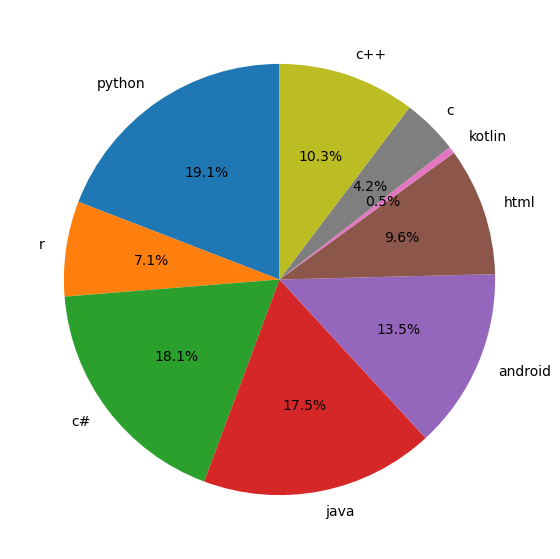

In [46]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x, labels = y,autopct='%1.1f%%', startangle=90);
plt.savefig('Total accepted answers pie.png')

In [47]:
dict_view_count = {'python':0, 'r':0, 'c#':0, 'java':0, 'android':0, 'html':0, 'kotlin':0, 'c':0, 'c++':0}

In [48]:
for i in range(0,len(test.view_count)):
    dict_view_count[test.clean_tags[i]] =  dict_view_count.get(test.clean_tags[i]) + test.view_count[i]

In [49]:
x = dict_view_count.values()
y = dict_view_count.keys()
x = list(x)
y= list(y)

# Analyses on total views for each language which gives us insight into most popular language

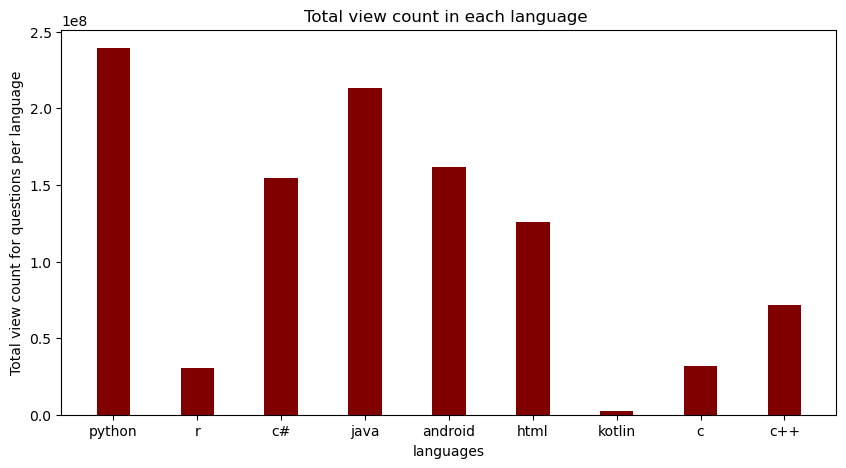

<Figure size 640x480 with 0 Axes>

In [50]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, x, color ='maroon',
        width = 0.4)
 
plt.xlabel("languages")
plt.ylabel("Total view count for questions per language")
plt.title("Total view count in each language ")
plt.show()
plt.savefig('Total view count in each language bar.png')

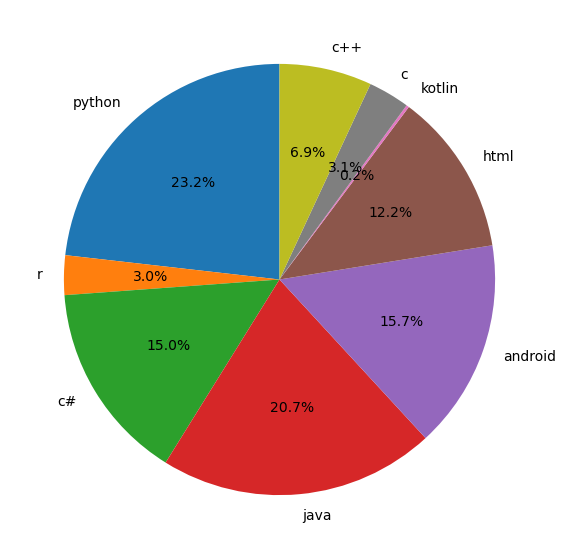

In [51]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x, labels = y,autopct='%1.1f%%', startangle=90);
plt.savefig('Total view count in each language pie.png')

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219390 entries, 0 to 219389
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               219390 non-null  int64         
 1   _id                 219390 non-null  int64         
 2   accepted_answer_id  77662 non-null   float64       
 3   answer_count        219390 non-null  float64       
 4   comment_count       219390 non-null  float64       
 5   creation_date       219390 non-null  datetime64[ns]
 6   favorite_count      53382 non-null   float64       
 7   owner_user_id       215201 non-null  float64       
 8   related_posts       219390 non-null  object        
 9   score               219390 non-null  float64       
 10  tags                219390 non-null  object        
 11  title               219390 non-null  object        
 12  view_count          219390 non-null  float64       
 13  tags_list           219390 no

In [53]:
test[test.creation_date == 2008]

Empty DataFrame
Columns: [index, _id, accepted_answer_id, answer_count, comment_count, creation_date, favorite_count, owner_user_id, related_posts, score, tags, title, view_count, tags_list, clean_tags]
Index: []

In [54]:
df_2008 = test[(test['creation_date'] > '2008-01-01 00:00:00') & (test['creation_date'] < '2008-12-31 00:00:00')]
df_2009 = test[(test['creation_date'] > '2009-01-01 00:00:00') & (test['creation_date'] < '2009-12-31 00:00:00')]
df_2010 = test[(test['creation_date'] > '2010-01-01 00:00:00') & (test['creation_date'] < '2010-12-31 00:00:00')]
df_2011 = test[(test['creation_date'] > '2011-01-01 00:00:00') & (test['creation_date'] < '2011-12-31 00:00:00')]
df_2012 = test[(test['creation_date'] > '2012-01-01 00:00:00') & (test['creation_date'] < '2012-12-31 00:00:00')]
df_2013 = test[(test['creation_date'] > '2013-01-01 00:00:00') & (test['creation_date'] < '2013-12-31 00:00:00')]
df_2014 = test[(test['creation_date'] > '2014-01-01 00:00:00') & (test['creation_date'] < '2014-12-31 00:00:00')]
df_2015 = test[(test['creation_date'] > '2015-01-01 00:00:00') & (test['creation_date'] < '2015-12-31 00:00:00')]
df_2016 = test[(test['creation_date'] > '2016-01-01 00:00:00') & (test['creation_date'] < '2016-12-31 00:00:00')]
df_2017 = test[(test['creation_date'] > '2017-01-01 00:00:00') & (test['creation_date'] < '2017-12-31 00:00:00')]
df_2018 = test[(test['creation_date'] > '2018-01-01 00:00:00') & (test['creation_date'] < '2018-12-31 00:00:00')]
df_2019 = test[(test['creation_date'] > '2019-01-01 00:00:00') & (test['creation_date'] < '2019-12-31 00:00:00')]
df_2020 = test[(test['creation_date'] > '2020-01-01 00:00:00') & (test['creation_date'] < '2020-12-31 00:00:00')]
df_2021 = test[(test['creation_date'] > '2021-01-01 00:00:00') & (test['creation_date'] < '2021-12-31 00:00:00')]

In [55]:
df_2008 = df_2008.reset_index(drop = True)
df_2009 = df_2009.reset_index(drop = True)
df_2010 = df_2010.reset_index(drop = True)
df_2011 = df_2011.reset_index(drop = True)
df_2012 = df_2012.reset_index(drop = True)
df_2013 = df_2013.reset_index(drop = True)
df_2014 = df_2014.reset_index(drop = True)
df_2015 = df_2015.reset_index(drop = True)
df_2016 = df_2016.reset_index(drop = True)
df_2017 = df_2017.reset_index(drop = True)
df_2018 = df_2018.reset_index(drop = True)
df_2019 = df_2019.reset_index(drop = True)
df_2020 = df_2020.reset_index(drop = True)
df_2021 = df_2021.reset_index(drop = True)

In [56]:
def create_count(df):
    dict_count = {'python':0, 'r':0, 'c#':0, 'java':0, 'android':0, 'html':0, 'kotlin':0, 'c':0, 'c++':0}
    for i in range(0,len(df)):
        dict_count[df.clean_tags[i]] =  dict_count.get(df.clean_tags[i]) + 1
        
    return dict_count

In [57]:
dict_2008 = create_count(df_2008)
dict_2009 = create_count(df_2009)
dict_2010 = create_count(df_2010)
dict_2011 = create_count(df_2011)
dict_2012 = create_count(df_2012)
dict_2013 = create_count(df_2013)
dict_2014 = create_count(df_2014)
dict_2015 = create_count(df_2015)
dict_2016 = create_count(df_2016)
dict_2017 = create_count(df_2017)
dict_2018 = create_count(df_2018)
dict_2019 = create_count(df_2019)
dict_2020 = create_count(df_2020)
dict_2021 = create_count(df_2021)

In [58]:
def plot_total_question_per_year(dict_tmp):
    total = sum(list(dict_tmp.values()))
    return total

In [59]:
questions_quantity = list()

In [60]:
questions_quantity.append(plot_total_question_per_year(dict_2008))
questions_quantity.append(plot_total_question_per_year(dict_2009))
questions_quantity.append(plot_total_question_per_year(dict_2010))
questions_quantity.append(plot_total_question_per_year(dict_2011))
questions_quantity.append(plot_total_question_per_year(dict_2012))
questions_quantity.append(plot_total_question_per_year(dict_2013))
questions_quantity.append(plot_total_question_per_year(dict_2014))
questions_quantity.append(plot_total_question_per_year(dict_2015))
questions_quantity.append(plot_total_question_per_year(dict_2016))
questions_quantity.append(plot_total_question_per_year(dict_2017))
questions_quantity.append(plot_total_question_per_year(dict_2018))
questions_quantity.append(plot_total_question_per_year(dict_2019))
questions_quantity.append(plot_total_question_per_year(dict_2020))
questions_quantity.append(plot_total_question_per_year(dict_2021))


In [61]:
x = questions_quantity

In [62]:
y = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

# Analyses on total number of questions asked in each year

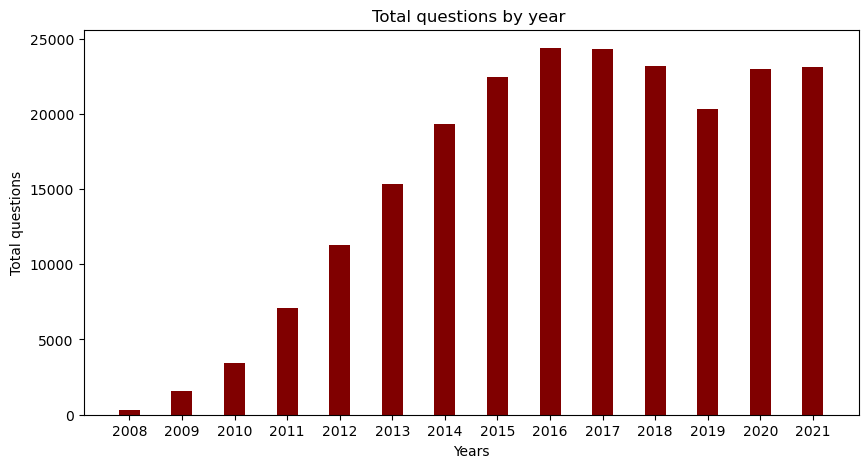

<Figure size 640x480 with 0 Axes>

In [63]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(y, x, color ='maroon',
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Total questions")
plt.title("Total questions by year ")
plt.show()
plt.savefig('Total view count in each language bar.png')